<a href="https://www.kaggle.com/code/francescoliveras/ps-s3-e13-eda-model-en-es?scriptVersionId=129425255" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#37FABC; font-size:160%; text-align:center;padding: 0px; border-bottom: 5px solid #407A68">PlayGround Series S3 E13 EDA and simple model</p>

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 5px solid #008F77">Intro</p>
​
**🟦EN**:
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em; color:#5361fc;">
This Kaggle workbook aims to provide a comprehensive exploratory data analysis (EDA) and a set of simple models (which will not be optimized), but which can give a vague idea of how to choose the best model for the given data set, with the ultimate goal of making decisions.
Through this EDA, we will be able to get a deeper understanding of the structure of the data, the values that have a relationship between them and the missing values and pattern or outliers that may affect when performing the modeling or selecting the model we want to use for prediction/recommendation. By performing an EDA, we can identify potential pitfalls and make the decisions and subsequent processing necessary to improve the performance and accuracy of the models.
</div>
​
**🟥ES**: 
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em; background-color: #c9b1fa; color:#38196e;">
Este cuaderno Kaggle tiene el objetivo proporcionar un análisis exploratorio de datos (AED) exhaustivo y un conjunto de modelos simples (los cuales no estarán optimizados), pero que pueden llegar a dar una vaga idea para escoger el mejor modelo, para el conjunto de datos dado, con el objetivo final de tomar decisiones.
​
A través de este AED, podremos obtener una comprensión más profunda de la estructura de los datos, los valores que tiene una relación entre ellos y los valores que faltan y patrón o valores anómalos que pueda afectar a la hora de realizar el modelado o seleccionar el modelo que queremos utilizar para la predicción / recomendación. Al realizar un EDA, podemos identificar posibles obstáculos y tomar las decisiones, y posteriormente el procesado necesario para mejorar el rendimiento y la precisión de los modelos.
</div>

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Data information</p>

**🟦EN**
All symptoms and Prognosis included associated with 11 Vector Borne Diseases.
Chikungunya
Dengue
Zika
Yellow Fever
Raft Valley Fever
West Nile Fever
Malaria
Tungiasis
Japanese Encephalitis
Plague
Lyme Disease

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Vector Borne Disease Prediction dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance. Note that in the original dataset some prognoses contain spaces, but in the competition dataset spaces have been replaced with underscores to work with the MPA@K metric.


**🟥ES**
Todos los síntomas y Pronóstico incluidos asociados a 11 Enfermedades Transmitidas por Vectores.
Chikungunya
Dengue
Zika
Fiebre Amarilla
Fiebre del Valle del Raft
Fiebre del Nilo Occidental
Paludismo
Tungiasis
Encefalitis japonesa
Peste
Enfermedad de Lym

El conjunto de datos para esta competición (tanto de entrenamiento como de prueba) se generó a partir de un modelo de aprendizaje profundo entrenado en el conjunto de datos de predicción de enfermedades transmitidas por vectores. Las distribuciones de las características son similares, aunque no exactamente iguales, a las del original. Siéntase libre de utilizar el conjunto de datos original como parte de esta competición, tanto para explorar las diferencias como para ver si la incorporación del original en el entrenamiento mejora el rendimiento del modelo. Tenga en cuenta que en el conjunto de datos original algunos pronósticos contienen espacios, pero en el conjunto de datos de la competición los espacios se han sustituido por guiones bajos para trabajar con la métrica MPA@K.

In [1]:
import os 
import sys
import math
import time
import umap
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.colors as mcolors

from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier,plot_importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, log_loss
from sklearn.inspection import permutation_importance
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split,cross_val_score,RepeatedStratifiedKFold,GridSearchCV

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')

In [2]:
# Put theme of notebook 
from colorama import Fore, Style

# Colors
red = Fore.RED + Style.BRIGHT
mgta = Fore.MAGENTA + Style.BRIGHT
yllw = Fore.YELLOW + Style.BRIGHT
cyn = Fore.CYAN + Style.BRIGHT
blue = Fore.BLUE + Style.BRIGHT

# Reset
res = Style.RESET_ALL

In [3]:
# Colors
YELLOW = "#F7C53E"

CYAN_G = "#0CF7AF"
CYAB_DARK = "#11AB7C"

PURPLE = "#D826F8"
PURPLE_DARJ = "#9309AB"
PURPLE_L = "#b683d6"

BLUE = "#0C97FA"
RED = "#FA1D19"
ORANGE = "#FA9F19"
GREEN = "#0CFA58"
LIGTH_BLUE = "#01FADC"
S_BLUE = "#81c9e6"
DARK_BLUE = "#394be6"
# Palettes
PALETTE_2 = [CYAN_G, PURPLE]
PALETTE_3 = [YELLOW, CYAN_G, PURPLE]
PALETTE_4 = [YELLOW, ORANGE, PURPLE, LIGTH_BLUE]
PALETTE_5 = [PURPLE_DARJ, PURPLE_L, PURPLE, BLUE, LIGTH_BLUE]
PALETTE_6 = [BLUE, RED, ORANGE, GREEN, LIGTH_BLUE, PURPLE]

# Vaporwave palette by Francesc Oliveras
PALETTE_7 = [PURPLE_DARJ, PURPLE_L, PURPLE, BLUE, LIGTH_BLUE, DARK_BLUE, S_BLUE]
PALETTE_7_C = [PURPLE_DARJ, BLUE, PURPLE, LIGTH_BLUE, PURPLE_L, S_BLUE, DARK_BLUE]

RANDOM_STATE = 500

sns.palplot(sns.color_palette(PALETTE_7))

# Set Style
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

cmap = mcolors.LinearSegmentedColormap.from_list("", PALETTE_2)
cmap_2 = mcolors.LinearSegmentedColormap.from_list("", [S_BLUE, PURPLE_DARJ])

font_family = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=10), width=1000, height=500))
SEED = 750

In [4]:
PATH = "/kaggle/input/playground-series-s3e13"
TRAIN_FILENAME = "train.csv"
TEST_FILENAME = "test.csv"
SUBMISSION_FILENAME = "sample_submission.csv"
ORIGINAL_PATH = "/kaggle/input/vector-borne-disease-prediction"
TEST_FILENAME_ORIGINAL = "testt.csv"
TRAIN_FILENAME_ORIGINAL = "trainn.csv"

# Data dir
TEST_DIR = os.path.join(PATH, TEST_FILENAME)
TRAIN_DIR = os.path.join(PATH, TRAIN_FILENAME)
TEST_ORIGINAL_DIR = os.path.join(ORIGINAL_PATH, TEST_FILENAME_ORIGINAL)
TRAIN_ORIGINAL_DIR = os.path.join(ORIGINAL_PATH, TRAIN_FILENAME_ORIGINAL)
SUBMISSION_DIR = os.path.join(PATH, SUBMISSION_FILENAME)

In [5]:
ID = "id"
SUDDEN_FEVER = "sudden_fever"
HEADACHE = "headache"
MOUTH_BLEED = "mouth_bleed"
NOSE_BLEED = "nose_bleed"
MUSCLE_PAIN = "muscle_pain"
JOINT_PAIN = "joint_pain"
VOMITING = "vomiting"
RASH = "rash"
DIARRHEA = "diarrhea"
HYPOTENSION = "hypotension"
PLEURAL_EFFUSION = "pleural_effusion"
ASCITES = "ascites"
GASTRO_BLEEDING = "gastro_bleeding"
SWELLING = "swelling"
NAUSEA = "nausea"
CHILLS = "chills"
MYALGIA = "myalgia"
DIGESTION_TROUBLE = "digestion_trouble"
FATIGUE = "fatigue"
SKIN_LESIONS = "skin_lesions"
STOMACH_PAIN = "stomach_pain"
ORBITAL_PAIN = "orbital_pain"
NECK_PAIN = "neck_pain"
WEAKNESS = "weakness"
BACK_PAIN = "back_pain"
WEIGHT_LOSS = "weight_loss"
GUM_BLEED = "gum_bleed"
JAUNDICE = "jaundice"
COMA = "coma"
DIZINESS = "diziness"
INFLAMMATION = "inflammation"
RED_EYES = "red_eyes"
LOSS_OF_APPETITE= 'loss_of_appetite'
URINATION_LOSS= 'urination_loss'
SLOW_HEART_RATE= 'slow_heart_rate'
ABDOMINAL_PAIN= 'abdominal_pain'
LIGHT_SENSITIVITY=  'light_sensitivity'
YELLOW_SKIN= 'yellow_skin'
YELLOW_EYES= 'yellow_eyes'
FACIAL_DISTORTION= 'facial_distortion'
MICROCEPHALY= 'microcephaly'
RIGOR= 'rigor'
BITTER_TONGUE= 'bitter_tongue'
CONVULSION= 'convulsion'
ANEMIA= 'anemia'
COCACOLA_URINE= 'cocacola_urine'
HYPOGLYCEMIA= 'hypoglycemia'
PROSTRACTION= 'prostraction'
HYPERPYREXIA= 'hyperpyrexia'
STIFF_NECK= 'stiff_neck'
IRRITABILITY= 'irritability'
CONFUSION= 'confusion'
TARGET = 'prognosis'

In [6]:
CATEGORICAL_COLS = []
NUM_COLS = []
BOOL_COLS = []
ORDINAL_COLS = []

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Functions</p>

In [7]:
def show_corr_heatmap(df, title):
    
    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize = (15, 10))
    plt.title(title)
    sns.heatmap(corr, annot = False, linewidths=.5, fmt=".2f", square=True, mask = mask, cmap=cmap_2)
    plt.show()

In [8]:
def data_description(df):
    print("Data description")
    print(f"Total number of records {df.shape[0]}")
    print(f'number of features {df.shape[1]}\n\n')
    columns = df.columns
    data_type = []
    
    # Get the datatype of features
    for col in df.columns:
        data_type.append(df[col].dtype)
        
    n_uni = df.nunique()
    # Number of NaN values
    n_miss = df.isna().sum()
    
    names = list(zip(columns, data_type, n_uni, n_miss))
    variable_desc = pd.DataFrame(names, columns=["Name","Type","Unique levels","Missing"])
    print(variable_desc)

In [9]:
def plot_cont(col, ax, color=PALETTE_7[0]):
    sns.histplot(data=comb_df, x=col,
                hue="set",ax=ax, hue_order=labels,
                common_norm=False, **histplot_hyperparams)
    
    ax_2 = ax.twinx()
    ax_2 = plot_cont_dot(
        comb_df.query('set=="train"'),
        col, TARGET, ax_2,
        color=color
    )
    
    ax_2 = plot_cont_dot(
        comb_df, col,
        TARGET, ax_2,
        color=color
    )

In [10]:
def plot_cont_dot(
    df, column, target, ax,
    show_yticks=False, color=PALETTE_7[0]
):

    bins = pd.cut(df[column], bins=n_bins)
    bins = pd.IntervalIndex(bins)
    bins = (bins.left + bins.right) / 2
    target = df[target]
    target = target.groupby(bins).mean()
    target.plot(
        ax=ax, linestyle="",
        marker=".", color=color,
        label=f"Mean {target.name}"
    )
    ax.grid(visible=False)
    
    if not show_yticks:
        ax.get_yaxis().set_ticks([])
        
    return ax

In [11]:
## Boolean values only
def pie_plot(df: pd.DataFrame, hover_temp: str = "Status: ",
            feature=TARGET, palette=[LIGTH_BLUE,"#221e8f"], color=[BLUE ,DARK_BLUE],
            title="Target distribution"):
#     df[feature] = df[feature].replace({0: "Not cancelled ", 1: "Cancelled"})
    target = df[[feature]].value_counts(normalize=True).sort_index().round(decimals=3)*100
    fig = go.Figure()
    
    fig.add_trace(go.Pie(labels=target.index, values=target, hole=.4,
                        sort=False, showlegend=True, marker=dict(colors=color, line=dict(color=palette,width=2)),
                        hovertemplate = "%{label} " + hover_temp + ": %{value:.2f}%<extra></extra>"))
    
    fig.update_layout(template=font_family, title=title, 
                  legend=dict(traceorder='reversed',y=1.05,x=0),
                  uniformtext_minsize=15, uniformtext_mode='hide',height=600)
    fig.show()

In [12]:
def append_df(df1, df2, reset_index=True):
    appended_df = pd.concat([df1, df2], axis=0, ignore_index=reset_index)
    return appended_df

In [13]:
def calculate_aps_score(actual, predicted, k=10):
    if not actual:
        return 0.0

    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    return score / min(len(actual), k)

In [14]:
def calculate_mean_average_precision_at_k(actual, pred, x=3):
    sorted_prob_ids = np.argsort(-pred)
    topk_pred = sorted_prob_ids[:,:x]
    
    return np.mean([calculate_aps_score(a,p,x) for a,p in zip(actual, topk_pred)])

In [15]:
def get_top_three(y_prob):
    # Sort the probability scores in descending order and get the index positions
    # of the top three probabilities for each sample.
    sorted_prob_ids = np.argsort(-y_prob)
    top3_diss_ids = sorted_prob_ids[:,:3]  # Take only the first three indices
    
    # Save the original shape of the top3_diss_ids array to reshape it later.
    original_shape = top3_diss_ids.shape
    
    # Use inverse_transform to get the disease labels associated with the top three indices.
    top3_diss = ord_encoder.inverse_transform(top3_diss_ids.reshape(-1,1))
    
    # Reshape the top3_diss array to match its original shape.
    top3_diss = top3_diss.reshape(original_shape)
    
    # Return the top three disease labels for each sample.
    return top3_diss


## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Import data</p>

In [16]:
train_df_pg = pd.read_csv(TRAIN_DIR)
test_df = pd.read_csv(TEST_DIR)
test_original_df = pd.read_csv(TEST_ORIGINAL_DIR)
train_original_df = pd.read_csv(TRAIN_ORIGINAL_DIR)
submission_df = pd.read_csv(SUBMISSION_DIR)


In [17]:
test_original_df[TARGET] = test_original_df[TARGET].str.replace(' ', '_')
train_original_df[TARGET] = train_original_df[TARGET].str.replace(' ', '_')
orig = pd.concat([train_original_df, test_original_df], axis=0)
train_df = pd.concat([train_df_pg, orig], axis=0)
train_df.drop(columns=[ID], inplace=True)

In [18]:
features = [c for c in train_df_pg.columns if c!=TARGET]
features.remove(ID)
print(features)
for c in features:
    train_df_pg[c] = train_df_pg[c].astype(int)

['sudden_fever', 'headache', 'mouth_bleed', 'nose_bleed', 'muscle_pain', 'joint_pain', 'vomiting', 'rash', 'diarrhea', 'hypotension', 'pleural_effusion', 'ascites', 'gastro_bleeding', 'swelling', 'nausea', 'chills', 'myalgia', 'digestion_trouble', 'fatigue', 'skin_lesions', 'stomach_pain', 'orbital_pain', 'neck_pain', 'weakness', 'back_pain', 'weight_loss', 'gum_bleed', 'jaundice', 'coma', 'diziness', 'inflammation', 'red_eyes', 'loss_of_appetite', 'urination_loss', 'slow_heart_rate', 'abdominal_pain', 'light_sensitivity', 'yellow_skin', 'yellow_eyes', 'facial_distortion', 'microcephaly', 'rigor', 'bitter_tongue', 'convulsion', 'anemia', 'cocacola_urine', 'hypoglycemia', 'prostraction', 'hyperpyrexia', 'stiff_neck', 'irritability', 'confusion', 'tremor', 'paralysis', 'lymph_swells', 'breathing_restriction', 'toe_inflammation', 'finger_inflammation', 'lips_irritation', 'itchiness', 'ulcers', 'toenail_loss', 'speech_problem', 'bullseye_rash']


## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">EDA and data modification</p>

In [19]:
len(train_df.columns)

65

In [20]:
len(test_df.columns)

65

In [21]:
data_description(train_df)
data_description(test_df)
data_description(train_original_df)
data_description(test_original_df)

Data description
Total number of records 970
number of features 65


              Name     Type  Unique levels  Missing
0     sudden_fever  float64              2        0
1         headache  float64              2        0
2      mouth_bleed  float64              2        0
3       nose_bleed  float64              2        0
4      muscle_pain  float64              2        0
..             ...      ...            ...      ...
60          ulcers  float64              2        0
61    toenail_loss  float64              2        0
62  speech_problem  float64              2        0
63   bullseye_rash  float64              2        0
64       prognosis   object             11        0

[65 rows x 4 columns]
Data description
Total number of records 303
number of features 65


              Name     Type  Unique levels  Missing
0               id    int64            303        0
1     sudden_fever  float64              2        0
2         headache  float64              2        0
3      

In [22]:
train_df = append_df(train_df, train_original_df)
train_df.head()

sudden_fever  headache  mouth_bleed  nose_bleed  muscle_pain  joint_pain  \
0           1.0       1.0          0.0         1.0          1.0         1.0   
1           0.0       0.0          0.0         0.0          0.0         0.0   
2           0.0       1.0          1.0         1.0          0.0         1.0   
3           0.0       0.0          1.0         1.0          1.0         1.0   
4           0.0       0.0          0.0         0.0          0.0         0.0   

   vomiting  rash  diarrhea  hypotension  ...  breathing_restriction  \
0       1.0   0.0       1.0          1.0  ...                    0.0   
1       1.0   0.0       1.0          0.0  ...                    0.0   
2       1.0   1.0       1.0          1.0  ...                    1.0   
3       0.0   1.0       0.0          1.0  ...                    0.0   
4       0.0   0.0       1.0          0.0  ...                    0.0   

   toe_inflammation  finger_inflammation  lips_irritation  itchiness  ulcers  \
0               0.0                  0.0              0.0        0.0     0.0   
1               0.0                  0.0              0.0        0.0     0.0   
2               1.0                  1.0              1.0        1.0     0.0   
3               0.0                  0.0              0.0        0.0     0.0   
4               1.0                  0.0              0.0        1.0     1.0   

   toenail_loss  speech_problem  bullseye_rash          prognosis  
0           0.0             0.0            0.0       Lyme_disease  
1           0.0             0.0            0.0          Tungiasis  
2           1.0             1.0            1.0       Lyme_disease  
3           0.0             0.0            0.0               Zika  
4           1.0             0.0            0.0  Rift_Valley_fever  

[5 rows x 65 columns]

In [23]:
test_df.drop(ID, axis=1, inplace=True)

In [24]:
labels = ["train", "test", "original"]

In [25]:
comb_df = pd.concat([
    train_df.assign(set=labels[0]),
    test_df.assign(set=labels[1]),
    test_original_df.assign(set=labels[2]),
])
comb_df.reset_index(inplace=True)

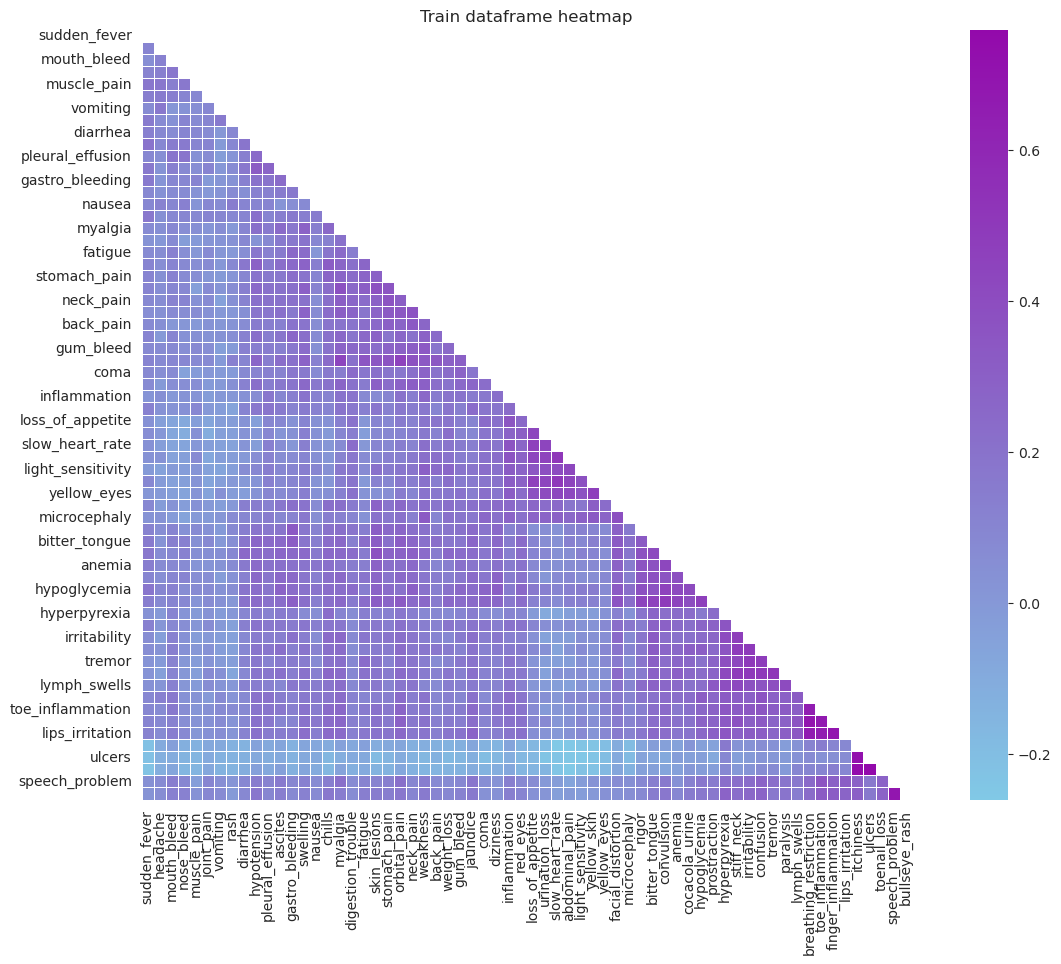

None

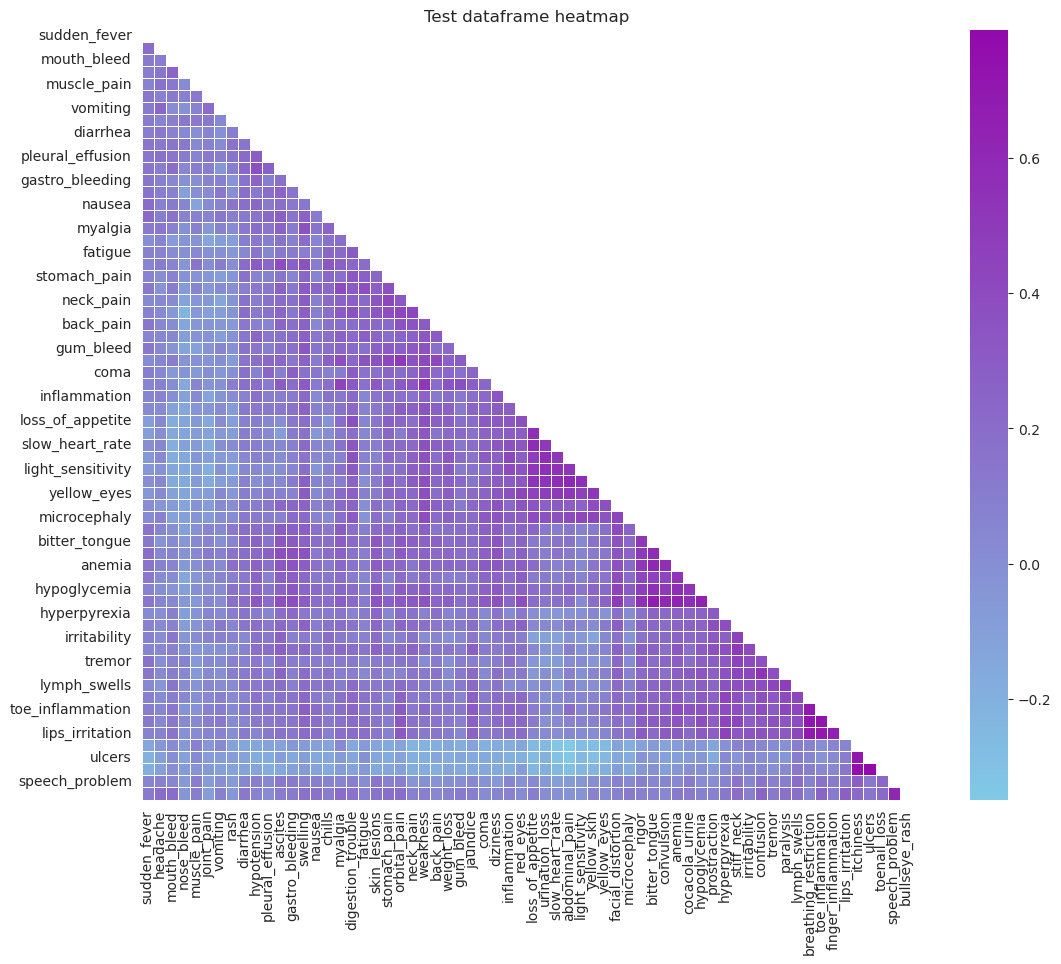

None

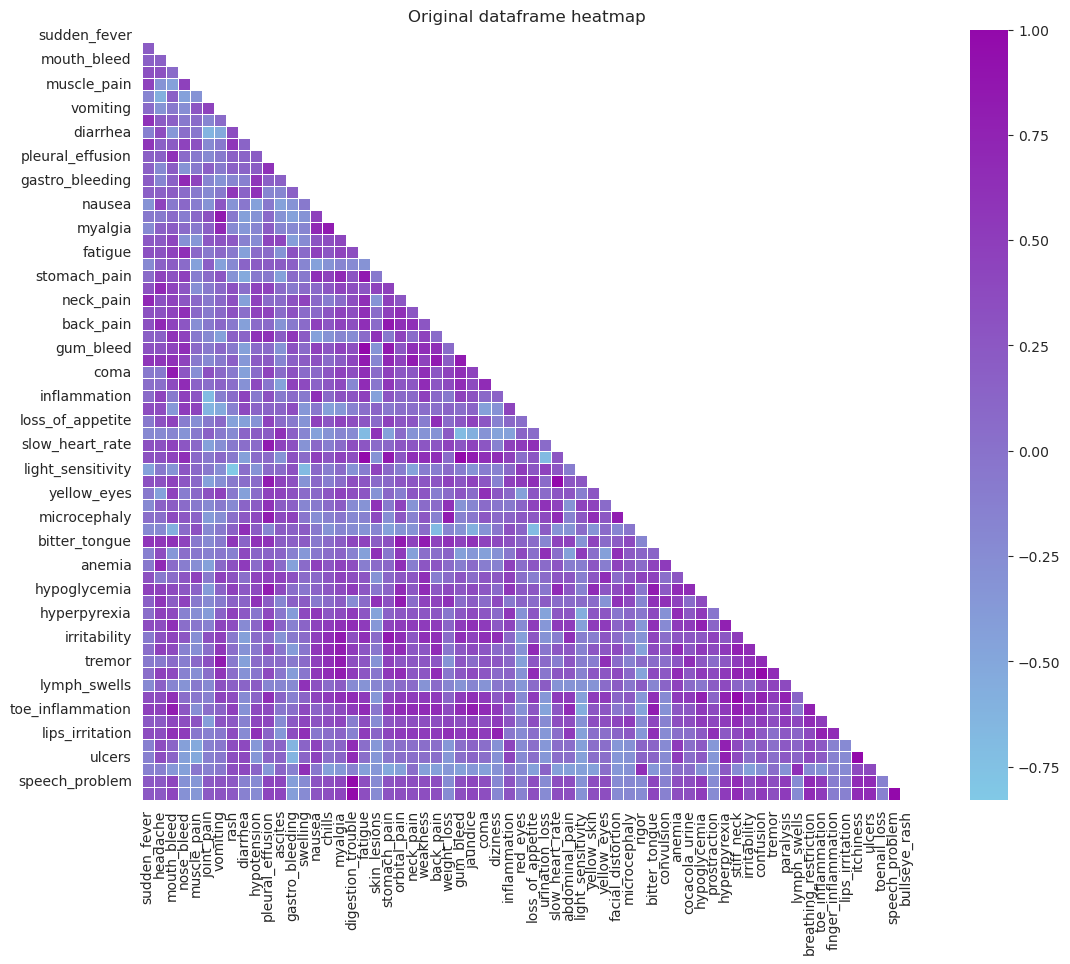

None

In [26]:
display(show_corr_heatmap(train_df, "Train dataframe heatmap"))
display(show_corr_heatmap(test_df, "Test dataframe heatmap"))
display(show_corr_heatmap(test_original_df, "Original dataframe heatmap"))

In [27]:
columns = test_df.columns
n_cols = 5
n_rows = math.ceil(len(columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
ax = ax.flatten()

for i, column in enumerate(columns):
    plot_axes = [ax[i]]
          
    sns.kdeplot(
        train_df[column], label="Train PS dataframe",
        ax=ax[i], color=PALETTE_7_C[0], fill = True
    )

    sns.kdeplot(
        test_df[column], label="Test PS datafraem",
        ax=ax[i], color=PALETTE_7_C[1], fill = True
    )
    
    sns.kdeplot(
        test_original_df[column], label="Original train dataframe",
        ax=ax[i], color=PALETTE_7_C[2], fill = True
    )
    
    # titles
    ax[i].set_title(f"Distribution of {column}");
    ax[i].set_xlabel(None)
    
    plot_axes = [ax[i]]
    handles = []
    for plot_ax in plot_axes:
        handles += plot_ax.get_legend_handles_labels()[0]
        plot_ax.legend().remove()
    
for i in range(i+1, len(ax)):
    ax[i].axis("off")
    
fig.suptitle(f"Datasets Distributions comparation\n\n", fontsize=20, ha="center", fontweight="bold")
fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, 0.9), fontsize=20, ncol=4)
plt.tight_layout()

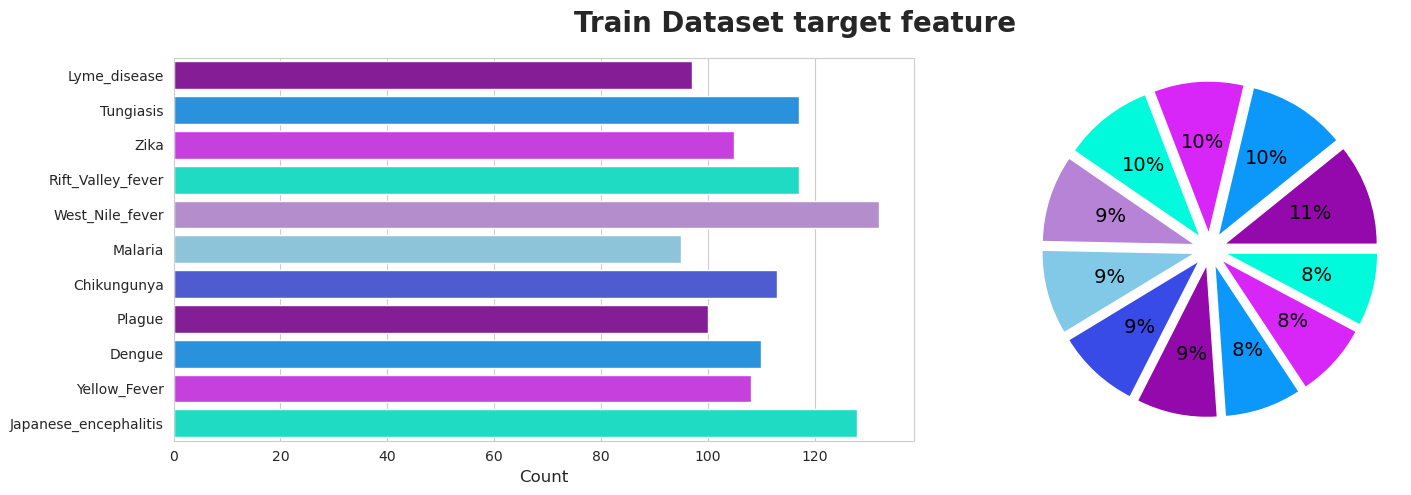

In [28]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5))
ax = ax.flatten()

sns.countplot(data = train_df, y = TARGET, ax = ax[0], palette=PALETTE_7_C)
ax[0].yaxis.label.set_size(12)
plt.yticks(fontsize = 10)
ax[0].set_xlabel('Count', fontsize = 12)
ax[0].set_ylabel(None)
plt.xticks(fontsize = 12)

ax[1].pie(
    train_df[TARGET].value_counts(), 
    explode = [.1 for i in range(0, 11)], 
    autopct = '%2.f%%',
    textprops = {'size' : 14, 'color' : 'black'},
    colors=PALETTE_7_C
)

fig.suptitle('Train Dataset target feature', fontweight = 'bold', fontsize = 20)
plt.tight_layout()

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Data preparation</p>

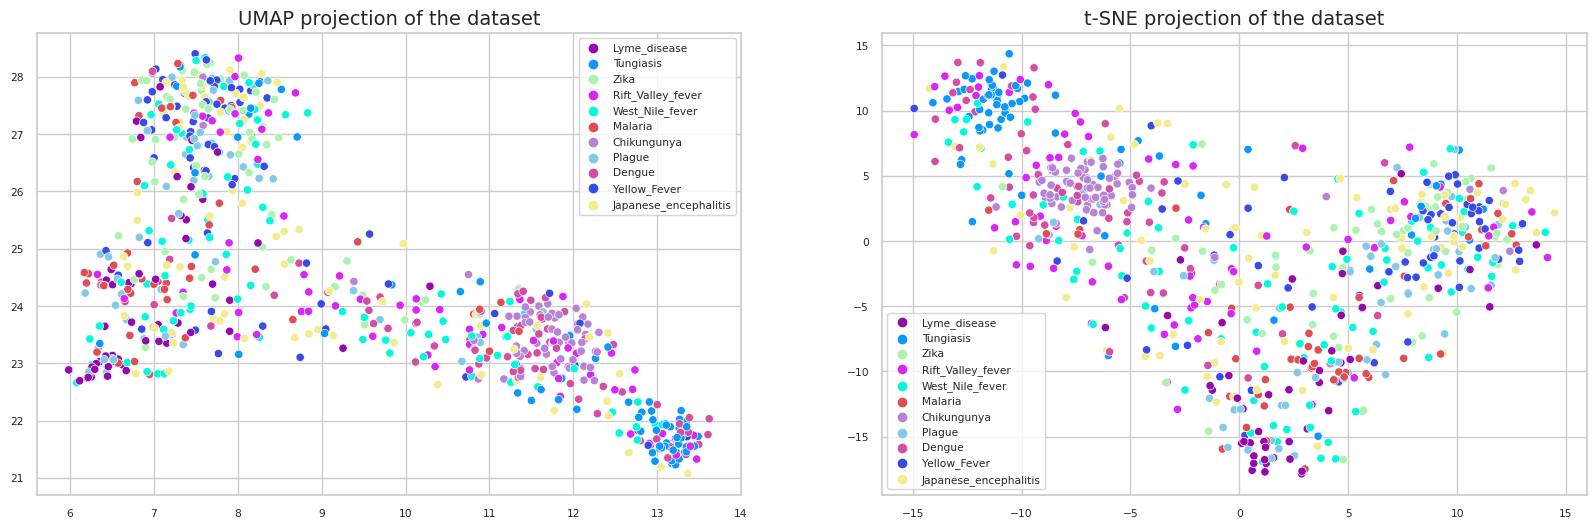

In [29]:
PALETTE_11 = [PURPLE_DARJ, BLUE, "#ABF3AF", PURPLE, LIGTH_BLUE, "#DE4E54", PURPLE_L, S_BLUE, "#D44EA3", DARK_BLUE, "#F4EB8C"]

# Extract the feature values and target labels from the train_df_pg dataframe.
X = train_df_pg.iloc[:,1:-1].values 
y = train_df_pg.iloc[:,-1].values   # Target labels

# Initialize and fit the UMAP model to obtain a 2-dimensional embedding of the feature values.
umap_model = umap.UMAP(n_components=2, n_neighbors=70, min_dist=0.1, metric='euclidean', random_state=SEED)
umap_embed = umap_model.fit_transform(X)

# Use t-SNE to obtain another 2-dimensional embedding of the feature values.
tsne_embed = TSNE(n_components=2, n_iter=4000, n_iter_without_progress=800, perplexity=50, learning_rate='auto', init='pca', random_state=SEED).fit_transform(X)

# Set the plot style and font size using seaborn.
sns.set_theme(style="whitegrid", font_scale=0.7)

# Create a figure with two subplots: one for the UMAP embedding and one for the t-SNE embedding.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6), squeeze=False)

# Create a scatter plot of the UMAP embedding, coloring the points by their target labels.
sns.scatterplot(umap_embed, x=umap_embed[:, 0], y=umap_embed[:, 1], hue=y, palette=PALETTE_11, ax=axes[0,0])
axes[0,0].set_title("UMAP projection of the dataset", fontsize=14)

# Create a scatter plot of the t-SNE embedding, coloring the points by their target labels.
sns.scatterplot(tsne_embed, x=tsne_embed[:, 0], y=tsne_embed[:, 1], hue=y, palette=PALETTE_11, ax=axes[0,1])
axes[0,1].set_title("t-SNE projection of the dataset", fontsize=14)

# Display the plot.
plt.show()

In [30]:
ord_encoder = OrdinalEncoder()
y = ord_encoder.fit_transform(train_df_pg[[TARGET]])
X = train_df_pg.iloc[:,1:-1].values
X_sub = test_df.iloc[:,1:].values

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Model prediction</p>

In [31]:
xgb_clf = XGBClassifier(objective='multi:softprob',random_state=SEED, tree_method='gpu_hist')

kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=SEED)

mapk_scorer = make_scorer(calculate_mean_average_precision_at_k, greater_is_better=True, needs_proba=True)
scores = cross_val_score(xgb_clf, X, y, cv=kfold, scoring=mapk_scorer)
log_loss_scores = cross_val_score(xgb_clf, X, y, cv=kfold, scoring='neg_log_loss')

print("MAP@3: %0.2f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))
print("Log_loss: %0.2f (+/- %0.4f)" % (-log_loss_scores.mean(), log_loss_scores.std() * 2))

MAP@3: 0.36 (+/- 0.0838)
Log_loss: 2.45 (+/- 0.4990)


In [32]:
# Initialize empty lists to store model evaluation scores and feature importance data
model_scores, log_loss_scores, acc_scores = [], [], []
importance_train, importance_val = [], []

# Get the feature labels
labels = train_df_pg.columns[1:-1]

# Loop through each fold of the k-fold cross-validation
for fold_idx, (train_idx, val_idx) in enumerate(kfold.split(X, y)):
    
    # Split the data into training and validation sets for this fold
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]
    
    # Train the XGBoost classifier
    xgb_clf.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=100, verbose=False)
    
    # Make predictions on the validation set
    y_prob = xgb_clf.predict_proba(X_val)
    y_pred = xgb_clf.predict(X_val)
    
    # Calculate evaluation metrics and append scores to lists
    acc = xgb_clf.score(X_val, y_val)
    map3 = calculate_mean_average_precision_at_k(y_val, y_prob)
    logloss = log_loss(y_val, y_prob)
    log_loss_scores.append(logloss)
    acc_scores.append(logloss)
    model_scores.append(map3)
    
    # Print fold evaluation scores
    print(f"{blue}Fold {fold_idx+1}:{res} {yllw}MAP@3 score{res} = {map3:.6f}\t {cyn}Log loss scores{res} = {logloss:.6f}\t {blue}Accuracy scores{res} = {acc:.6f}")
    
    # Calculate feature importances using permutation importance
    res_train = permutation_importance(xgb_clf, X_train, y_train, scoring='neg_log_loss', n_repeats=10, random_state=SEED)
    res_val = permutation_importance(xgb_clf, X_val, y_val, scoring='neg_log_loss', n_repeats=10, random_state=SEED)

    # Sort the feature importances in ascending order
    sorted_perm_train_idx = res_train.importances_mean.argsort()
    sorted_perm_val_idx = res_val.importances_mean.argsort()
    
    # Store the feature importances in DataFrames and append to lists
    perm_train = pd.DataFrame(res_train.importances[sorted_perm_train_idx].T, columns=labels[sorted_perm_train_idx])
    perm_val = pd.DataFrame(res_val.importances[sorted_perm_val_idx].T, columns=labels[sorted_perm_val_idx])
    
    importance_train.append(perm_train)
    importance_val.append(perm_val)
    
# Calculate mean evaluation scores over all folds
mean_scores = np.mean(model_scores)
mean_log_loss_scores = np.mean(log_loss_scores)
mean_acc_scores = np.mean(acc_scores)

# Print mean evaluation scores
print(f'{red}{"_" * 100}\n Mean MAP@3 score:{res} {mean_scores:.6f} (+/- {np.std(model_scores)**2})  {red}Mean Log loss score:{res} {mean_log_loss_scores:.6f}   {red}Mean Accuracy score:{res} {mean_acc_scores:.4f}')

Fold 1: MAP@3 score = 0.335681	 Log loss scores = 2.066436	 Accuracy scores = 0.295775
Fold 2: MAP@3 score = 0.335681	 Log loss scores = 1.978871	 Accuracy scores = 0.295775
Fold 3: MAP@3 score = 0.394366	 Log loss scores = 1.949963	 Accuracy scores = 0.352113
Fold 4: MAP@3 score = 0.328638	 Log loss scores = 2.016492	 Accuracy scores = 0.295775
Fold 5: MAP@3 score = 0.394366	 Log loss scores = 1.873038	 Accuracy scores = 0.352113
Fold 6: MAP@3 score = 0.370892	 Log loss scores = 2.052961	 Accuracy scores = 0.366197
Fold 7: MAP@3 score = 0.380282	 Log loss scores = 1.886282	 Accuracy scores = 0.366197
Fold 8: MAP@3 score = 0.345238	 Log loss scores = 1.977626	 Accuracy scores = 0.285714
Fold 9: MAP@3 score = 0.342857	 Log loss scores = 1.975932	 Accuracy scores = 0.271429
Fold 10: MAP@3 score = 0.350000	 Log loss scores = 1.988989	 Accuracy scores = 0.328571
Fold 11: MAP@3 score = 0.434272	 Log loss scores = 1.742652	 Accuracy scores = 0.366197
Fold 12: MAP@3 score = 0.394366	 Log loss

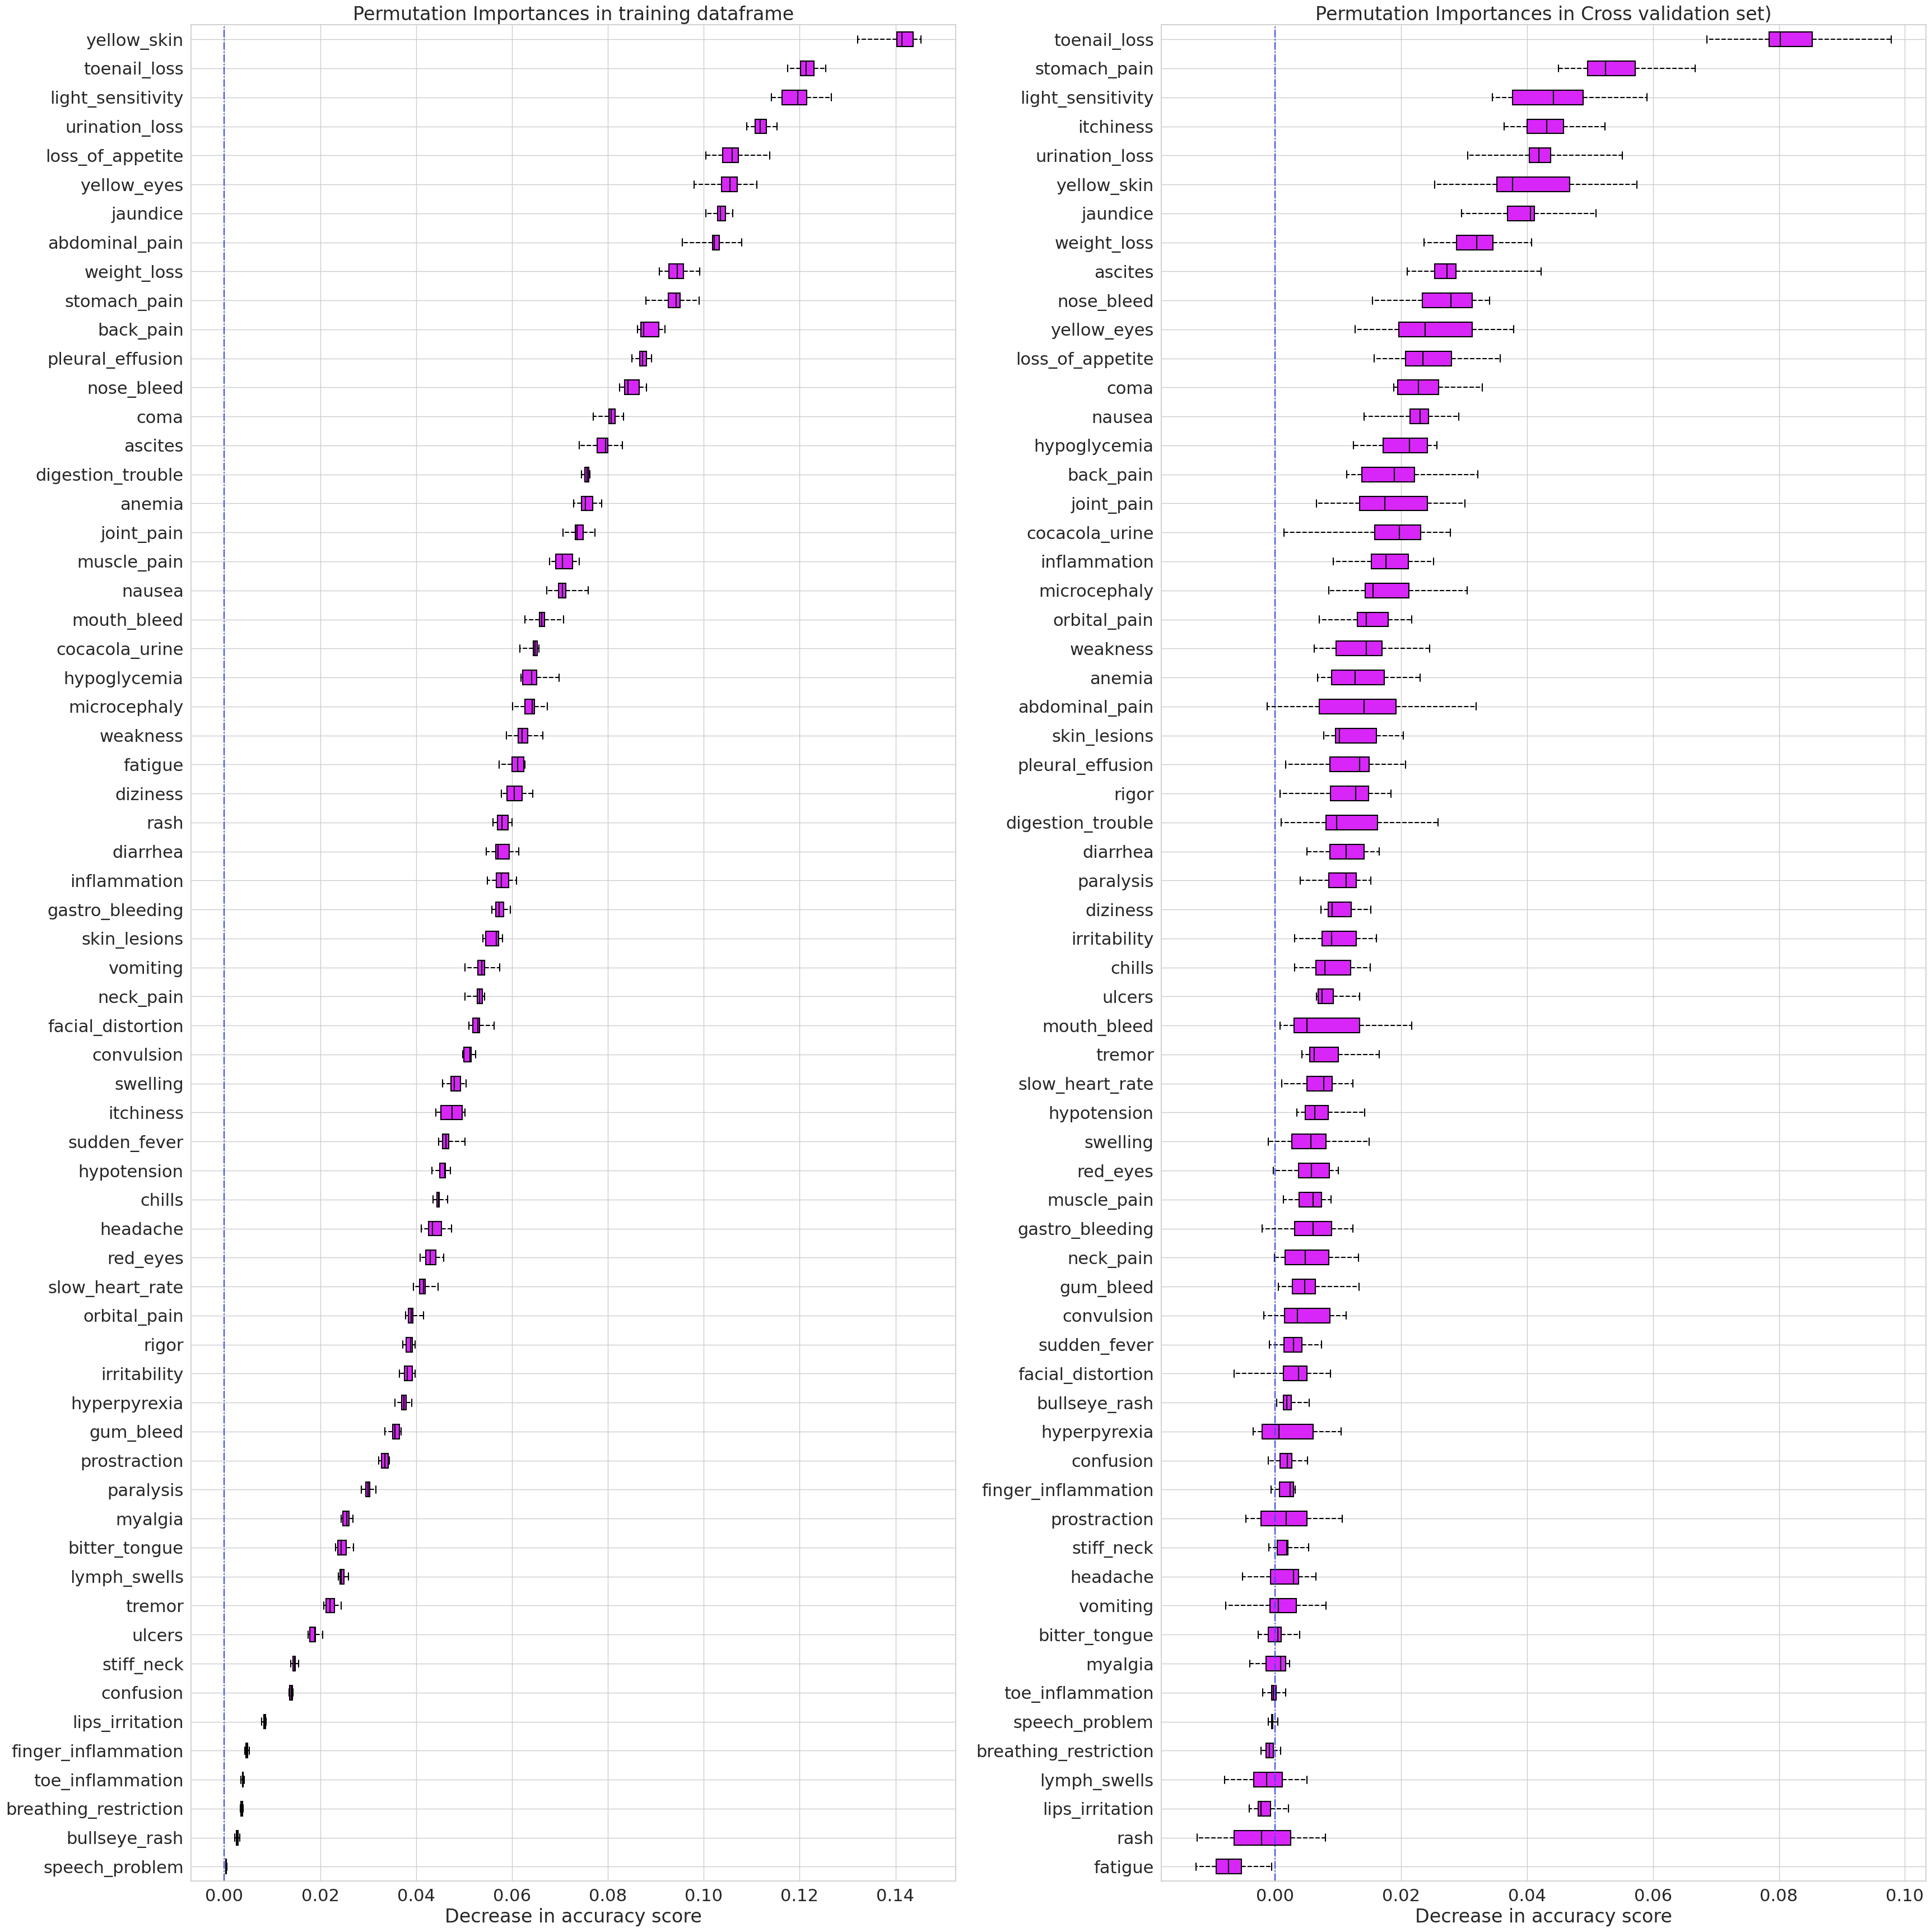

In [33]:
mean_train_imp = pd.DataFrame(columns=features)
n = len(importance_train[0])
for feat in features:
    num = 0.0
    for i in range (n):
        num += importance_train[i][feat]
    mean_train_imp[feat] = num / n
mean_train_imp = mean_train_imp[mean_train_imp.mean().sort_values().index]  

mean_importance_val = pd.DataFrame(columns=features)
n = len(importance_val[0])
for feat in features:
    num = 0.0
    for i in range (n):
        num += importance_val[i][feat]
    mean_importance_val[feat] = num / n
sorted_mean_importance_val = mean_importance_val[mean_importance_val.mean().sort_values().index]    

sns.set_theme(style="whitegrid", font_scale=2)
fig, (ax1, ax2) = plt.subplots(1, 2, layout="constrained", figsize=(35, 35))

boxprops = {"linestyle": "-", "edgecolor": "black", "linewidth": 1.5, "facecolor": PALETTE_7_C[2]}
whiskerprops = {"linestyle": "--", "linewidth": 1.5, "color": "black"}
capprops = {"linewidth": 1.5, "color": "black"}
medianprops = {"linewidth": 1.5, "color": "black"}

mean_train_imp.plot.box(patch_artist=True, vert=False, whis=10, ax=ax1, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops=medianprops)
ax1.set_title("Permutation Importances in training dataframe")
ax1.axvline(x=0, color=PALETTE_7_C[6], linestyle="-.")
ax1.set_xlabel("Decrease in accuracy score")

sorted_mean_importance_val.plot.box(patch_artist=True, vert=False, whis=10, ax=ax2, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops=medianprops)
ax2.set_title("Permutation Importances in Cross validation set)")
ax2.axvline(x=0, color=PALETTE_7_C[6], linestyle="-.")
ax2.set_xlabel("Decrease in accuracy score")

plt.tight_layout()

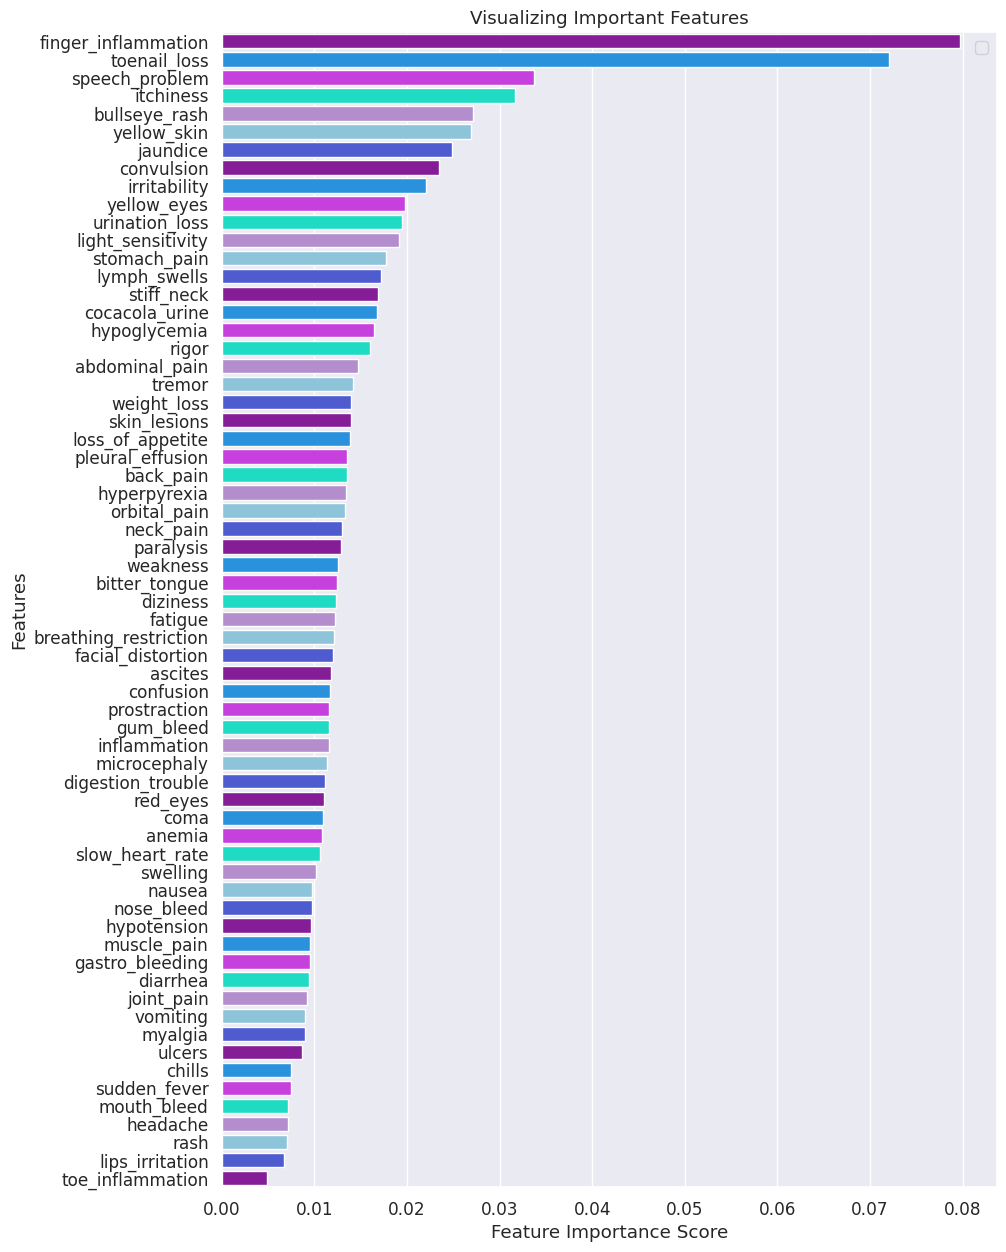

In [34]:
feature_imp = pd.Series(xgb_clf.feature_importances_, index=labels).sort_values(ascending=False)

sns.set_theme(font_scale=1.1)
plt.figure(figsize=(10,15))
sns.barplot(x=feature_imp, y=feature_imp.index, palette=PALETTE_7_C)

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

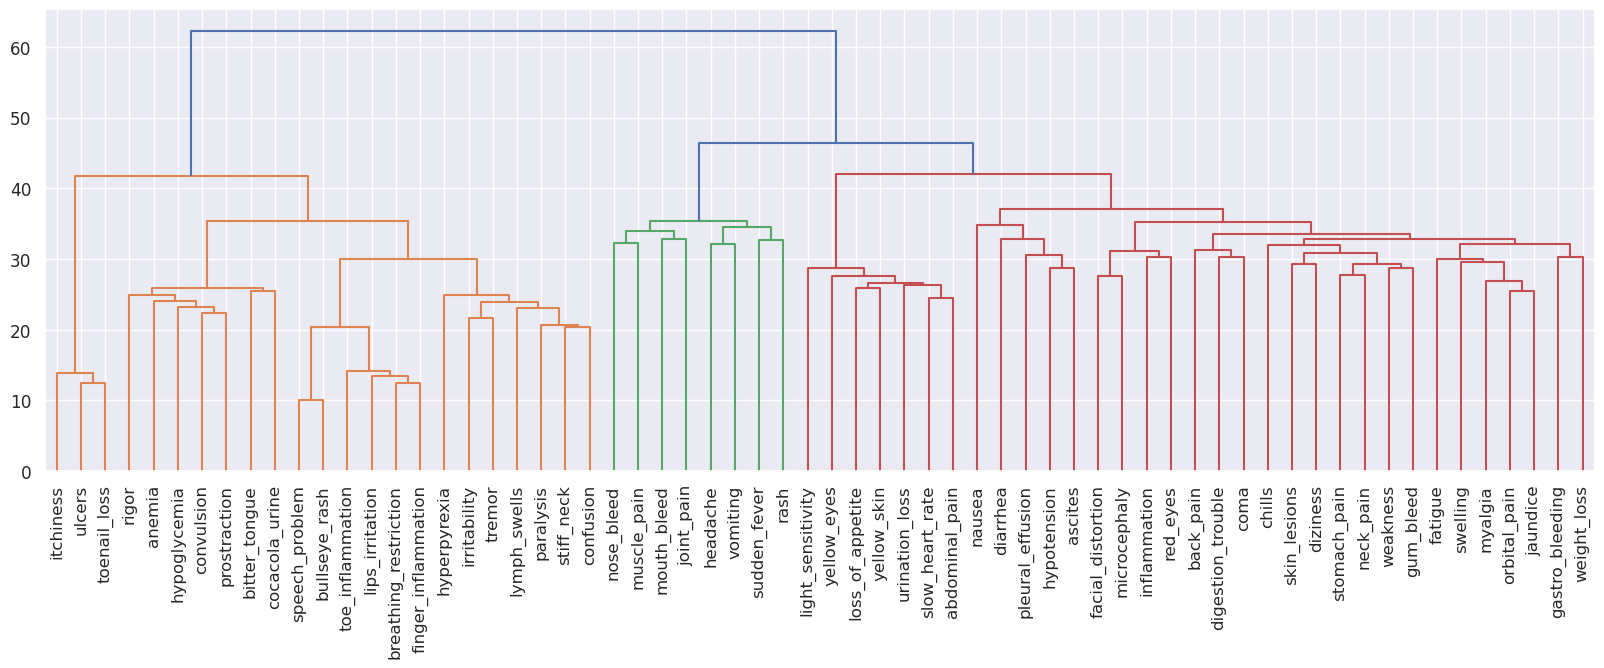

In [35]:
symp = features
data = train_df[features].values.T

dist = np.sqrt(np.sum((data[:, np.newaxis, :] - data[np.newaxis, :, :]) ** 2, axis=-1))

linkage_matrix = linkage(dist, method='complete')

fig,ax = plt.subplots(figsize=(20,6))
dendrogram(linkage_matrix, labels=symp, ax=ax)
ax.tick_params(axis='x', labelsize=12)


In [36]:
from scipy.cluster.hierarchy import fcluster

threshold = 40

clusters = fcluster(linkage_matrix, threshold, criterion='distance')

cluster_symptoms = {}
for symptom, cluster in zip(symp, clusters):
    if cluster not in cluster_symptoms:
        cluster_symptoms[cluster] = [f"'{symptom}'"]
    else:
        cluster_symptoms[cluster].append(f"'{symptom}'")

for cluster, symp in cluster_symptoms.items():
    print(f"Cluster {cluster}: {', '.join(symp)}")

Cluster 3: 'sudden_fever', 'headache', 'mouth_bleed', 'nose_bleed', 'muscle_pain', 'joint_pain', 'vomiting', 'rash'
Cluster 5: 'diarrhea', 'hypotension', 'pleural_effusion', 'ascites', 'gastro_bleeding', 'swelling', 'nausea', 'chills', 'myalgia', 'digestion_trouble', 'fatigue', 'skin_lesions', 'stomach_pain', 'orbital_pain', 'neck_pain', 'weakness', 'back_pain', 'weight_loss', 'gum_bleed', 'jaundice', 'coma', 'diziness', 'inflammation', 'red_eyes', 'facial_distortion', 'microcephaly'
Cluster 4: 'loss_of_appetite', 'urination_loss', 'slow_heart_rate', 'abdominal_pain', 'light_sensitivity', 'yellow_skin', 'yellow_eyes'
Cluster 2: 'rigor', 'bitter_tongue', 'convulsion', 'anemia', 'cocacola_urine', 'hypoglycemia', 'prostraction', 'hyperpyrexia', 'stiff_neck', 'irritability', 'confusion', 'tremor', 'paralysis', 'lymph_swells', 'breathing_restriction', 'toe_inflammation', 'finger_inflammation', 'lips_irritation', 'speech_problem', 'bullseye_rash'
Cluster 1: 'itchiness', 'ulcers', 'toenail_lo

In [37]:
train_df = pd.concat([train_df_pg, orig], axis=0)
train_df.drop(columns=[ID], inplace=True)
test_df = pd.read_csv(TEST_DIR)

pain = train_df.columns[train_df.columns.str.contains('pain')]
inflammation = train_df.columns[train_df.columns.str.contains(INFLAMMATION)]
bleeding = train_df.columns[train_df.columns.str.contains('bleed')]
skin = train_df.columns[train_df.columns.str.contains('bleed')].tolist() + ['itchiness']

similar_columns = [LOSS_OF_APPETITE, URINATION_LOSS, SLOW_HEART_RATE, ABDOMINAL_PAIN, LIGHT_SENSITIVITY, YELLOW_SKIN, YELLOW_EYES]
chikungunya_columns = [CONVULSION, 'finger_inflammation', 'speech_problem', 'toenail_loss', 'ulcers', 'itchiness', 'lips_irritation',
                       'breathing_restriction', 'toe_inflammation', 'paralysis', 'stomach_pain', 'confusion', 'irritability',
                       'bullseye_rash']
lyme_columns = ['jaundice', 'weight_loss', 'weakness', 'back_pain', 'sudden_fever', 'myalgia', CHILLS, 'orbital_pain', 'digestion_trouble']
red_cols = [DIARRHEA , HYPOTENSION , PLEURAL_EFFUSION, ASCITES, GASTRO_BLEEDING, SWELLING, NAUSEA, CHILLS,
            MYALGIA, DIGESTION_TROUBLE, FATIGUE, SKIN_LESIONS, STOMACH_PAIN, ORBITAL_PAIN, NECK_PAIN,
            WEAKNESS, BACK_PAIN, WEIGHT_LOSS, GUM_BLEED, JAUNDICE, COMA, DIZINESS, INFLAMMATION,
            RED_EYES, LOSS_OF_APPETITE, URINATION_LOSS, SLOW_HEART_RATE, ABDOMINAL_PAIN, LIGHT_SENSITIVITY,
            YELLOW_SKIN, YELLOW_EYES, FACIAL_DISTORTION, MICROCEPHALY]

orange_cols = [RIGOR, BITTER_TONGUE, CONVULSION, ANEMIA, COCACOLA_URINE, HYPOGLYCEMIA, PROSTRACTION, HYPERPYREXIA, STIFF_NECK, IRRITABILITY, CONFUSION,
               'tremor', 'paralysis', 'lymph_swells', 'breathing_restriction', 'toe_inflammation', 'finger_inflammation',
               'lips_irritation', 'itchiness', 'ulcers', 'toenail_loss', 'speech_problem', 'bullseye_rash']
green_cols = ['sudden_fever', 'headache', 'mouth_bleed', 'nose_bleed', 'muscle_pain', 'joint_pain', 'vomiting', 'rash']

for df in [train_df,test_df]:
    df['similar_cluster'] = df[similar_columns].sum(axis=1)
    df['chikungunya_columns'] = df[chikungunya_columns].sum(axis=1)
    df['lyme_columns'] = df[lyme_columns].sum(axis=1)
    df['pain'] = df[pain].sum(axis=1)
    df['skin'] = df[skin].sum(axis=1)
    df[INFLAMMATION] = df[inflammation].sum(axis=1)
    df['bleeding'] = df[bleeding].sum(axis=1)
    df['red_cols'] = df[red_cols].sum(axis=1)
    df['orange_cols'] = df[orange_cols].sum(axis=1)
    df['green_cols'] = df[green_cols].sum(axis=1)
target = "prognosis"
features = [c for c in train_df.columns if c!=target]
print(features)
for c in features:
    train_df[c] = train_df[c].astype(int)

['sudden_fever', 'headache', 'mouth_bleed', 'nose_bleed', 'muscle_pain', 'joint_pain', 'vomiting', 'rash', 'diarrhea', 'hypotension', 'pleural_effusion', 'ascites', 'gastro_bleeding', 'swelling', 'nausea', 'chills', 'myalgia', 'digestion_trouble', 'fatigue', 'skin_lesions', 'stomach_pain', 'orbital_pain', 'neck_pain', 'weakness', 'back_pain', 'weight_loss', 'gum_bleed', 'jaundice', 'coma', 'diziness', 'inflammation', 'red_eyes', 'loss_of_appetite', 'urination_loss', 'slow_heart_rate', 'abdominal_pain', 'light_sensitivity', 'yellow_skin', 'yellow_eyes', 'facial_distortion', 'microcephaly', 'rigor', 'bitter_tongue', 'convulsion', 'anemia', 'cocacola_urine', 'hypoglycemia', 'prostraction', 'hyperpyrexia', 'stiff_neck', 'irritability', 'confusion', 'tremor', 'paralysis', 'lymph_swells', 'breathing_restriction', 'toe_inflammation', 'finger_inflammation', 'lips_irritation', 'itchiness', 'ulcers', 'toenail_loss', 'speech_problem', 'bullseye_rash', 'similar_cluster', 'chikungunya_columns', 'ly

In [38]:
y = ord_encoder.fit_transform(train_df[['prognosis']])
X = train_df[features].values
X_sub = test_df.iloc[:,1:].values

In [39]:
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=SEED)
params = {
        'max_depth': 6,
        'max_bin': 256,
        'subsample': 0.6,
        'n_estimators': 94,
        'learning_rate': 0.1,
        'random_state': SEED,
        'colsample_bytree': 0.1, 
        'tree_method': 'gpu_hist',
        'objective': 'multi:softprob',   
    }

xgb_clf = XGBClassifier(**params)

model_scores,log_loss_scores,acc_scores = [],[],[]
labels = train_df_pg.columns[1:-1]


for fold_idx, (train_idx, val_idx) in enumerate(kfold.split(X,y)):
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]
    xgb_clf.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=100, verbose=False)
    
    y_prob = xgb_clf.predict_proba(X_val)
    y_pred = xgb_clf.predict(X_val)
    
    acc = xgb_clf.score(X_val, y_val)
    map3 = calculate_mean_average_precision_at_k(y_val,y_prob)
    logloss = log_loss(y_val,y_prob)
    model_scores.append(map3)
    log_loss_scores.append(logloss)
    acc_scores.append(logloss)
    print(f"{blue}Fold {fold_idx+1}:{res} {yllw}MAP@3 score{res} = {map3:.6f}\t {cyn}Log loss scores{res} = {logloss:.6f}\t {blue}Accuracy scores{res} = {acc:.6f}")

    
mean_scores = np.mean(model_scores)
mean_log_loss_scores = np.mean(log_loss_scores)
mean_acc_scores = np.mean(acc_scores)
print(f'{red}{"_" * 100}\n Mean MAP@3 score: {res}{mean_scores:.6f}\t {red}Mean Log loss score:{res} {mean_log_loss_scores:.6f}\t {red}Mean Accuracy score:{res} {mean_acc_scores:.6f}')

Fold 1: MAP@3 score = 0.489691	 Log loss scores = 1.662055	 Accuracy scores = 0.443299
Fold 2: MAP@3 score = 0.485395	 Log loss scores = 1.608437	 Accuracy scores = 0.458763
Fold 3: MAP@3 score = 0.493986	 Log loss scores = 1.655714	 Accuracy scores = 0.474227
Fold 4: MAP@3 score = 0.443299	 Log loss scores = 1.708968	 Accuracy scores = 0.381443
Fold 5: MAP@3 score = 0.490550	 Log loss scores = 1.631848	 Accuracy scores = 0.448454
Fold 6: MAP@3 score = 0.521478	 Log loss scores = 1.566296	 Accuracy scores = 0.479381
Fold 7: MAP@3 score = 0.469072	 Log loss scores = 1.685696	 Accuracy scores = 0.443299
Fold 8: MAP@3 score = 0.461340	 Log loss scores = 1.697405	 Accuracy scores = 0.427835
Fold 9: MAP@3 score = 0.484536	 Log loss scores = 1.662288	 Accuracy scores = 0.443299
Fold 10: MAP@3 score = 0.485395	 Log loss scores = 1.648864	 Accuracy scores = 0.448454
Fold 11: MAP@3 score = 0.477663	 Log loss scores = 1.671998	 Accuracy scores = 0.432990
Fold 12: MAP@3 score = 0.492268	 Log loss

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Submission</p>

In [40]:
y_sub = get_top_three(xgb_clf.predict_proba(X_sub))
prognosis =  np.apply_along_axis(lambda x: np.array(' '.join(x), dtype="object"), 1, y_sub)
xpt = np.hstack((np.reshape(test_df[ID].values, (-1,1)), np.reshape(prognosis, (-1,1))))
submission_df = pd.DataFrame(xpt, columns=[ID, TARGET])
submission_df.to_csv("submission.csv", index=False)
submission_df.head()

id                                          prognosis
0  707           Tungiasis Rift_Valley_fever Yellow_Fever
1  708                          Dengue Chikungunya Plague
2  709  West_Nile_fever Japanese_encephalitis Yellow_F...
3  710  Japanese_encephalitis Tungiasis Rift_Valley_fever
4  711         Yellow_Fever Malaria Japanese_encephalitis